In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

### Convergence of Four Estimators of $ \mathbb{E}[h(X)] $

**Fig.8:** Convergence of four estimators of $ \mathbb{E}[h(X)] $. Sampling from $ f $ (solid lines), importance sampling with Cauchy instrumental distribution (short dashes), with normal instrumental distribution (dots), and with exponential instrumental distribution (long dashes). The final values after 50,000 iterations are respectively 4.58, 4.42, 4.99, and 4.52, for a true value of 4.64.

---

#### Markov Chain Transition Matrix and Posterior Distributions

Assume the constraint $ P_1 + P_2 < 1 $ holds (see Geweke 1989 for a motivation related to continuous-time processes). If the sample is $ X_1, \dots, X_m $, and the prior distribution is

$$
p(P_1, P_2) \propto \frac{1}{(1 - P_1)(1 - P_2)}
$$

the posterior distribution of $ (P_1, P_2) $ is given by

$$
p(P_1, P_2 \mid m_{11}, m_{12}, m_{21}, m_{22}) \propto \frac{P_1^{m_{11}} P_2^{m_{22}}}{(1 - P_1)^{m_{12} + 1}(1 - P_2)^{m_{21} + 1}},
$$

where $ m_{ij} $ is the number of transitions from state $ i $ to state $ j $, defined as:

$$
m_{ij} = \sum_{t=1}^{m-1} \mathbb{1}_{\{X_t = i, X_{t+1} = j\}}.
$$

It follows that $ D = (m_{11}, m_{12}) $ is a sufficient statistic.

---

#### Posterior Expectations and Odds

Suppose the quantities of interest are the posterior expectations of the probabilities $ P_1, P_2 $, and the associated odds. Define the following functions:

$$
h_1(P_1, P_2) = P_1, \quad h_2(P_1, P_2) = P_2, \quad h_3(P_1, P_2) = \frac{P_1}{1 - P_1}, \quad h_4(P_1, P_2) = \frac{P_2}{1 - P_2},
$$

and

$$
h_5(P_1, P_2) = \log \left( \frac{P_1}{1 - P_1} \right).
$$

The posterior expectations of these functions can be calculated as:

$$
\mathbb{E}[h_k(P_1, P_2)] = \int h_k(P_1, P_2) p(P_1, P_2 \mid m_{11}, m_{12}, m_{21}, m_{22}) \, dP_1 \, dP_2.
$$


### Convergence of Four Estimators of $ \mathbb{E}[h(X)] $

**Fig.8:** Convergence of four estimators of $ \mathbb{E}[h(X)] $. Sampling from $ f $ (solid lines), importance sampling with Cauchy instrumental distribution (short dashes), with normal instrumental distribution (dots), and with exponential instrumental distribution (long dashes). The final values after 50,000 iterations are respectively 4.58, 4.42, 4.99, and 4.52, for a true value of 4.64.

---

#### Markov Chain Transition Matrix and Posterior Distributions

Assume the constraint $ P_1 + P_2 < 1 $ holds (see Geweke 1989 for a motivation related to continuous-time processes). If the sample is $ X_1, \dots, X_m $, and the prior distribution is

$$
p(P_1, P_2) \propto \frac{1}{(1 - P_1)(1 - P_2)}
$$

the posterior distribution of $ (P_1, P_2) $ is given by

$$
p(P_1, P_2 \mid m_{11}, m_{12}, m_{21}, m_{22}) \propto \frac{P_1^{m_{11}} P_2^{m_{22}}}{(1 - P_1)^{m_{12} + 1}(1 - P_2)^{m_{21} + 1}},
$$

where $ m_{ij} $ is the number of transitions from state $ i $ to state $ j $, defined as:

$$
m_{ij} = \sum_{t=1}^{m-1} \mathbb{1}_{\{X_t = i, X_{t+1} = j\}}.
$$

It follows that $ D = (m_{11}, m_{12}) $ is a sufficient statistic.

---

#### Posterior Expectations and Odds

Suppose the quantities of interest are the posterior expectations of the probabilities $ P_1, P_2 $, and the associated odds. Define the following functions:

$$
h_1(P_1, P_2) = P_1, \quad h_2(P_1, P_2) = P_2, \quad h_3(P_1, P_2) = \frac{P_1}{1 - P_1}, \quad h_4(P_1, P_2) = \frac{P_2}{1 - P_2},
$$

and

$$
h_5(P_1, P_2) = \log \left( \frac{P_1}{1 - P_1} \right).
$$

The posterior expectations of these functions can be calculated as:

$$
\mathbb{E}[h_k(P_1, P_2)] = \int h_k(P_1, P_2) p(P_1, P_2 \mid m_{11}, m_{12}, m_{21}, m_{22}) \, dP_1 \, dP_2.
$$

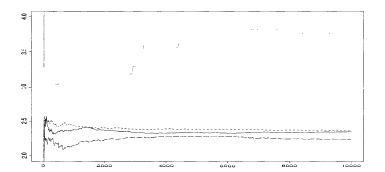

Fig.9. Convergence of four estimators of E, [hs(X)] for the true distribution (solid lines) and for the instrumental distributions 1 (dots), #2 (long dashes), and *з (short dashes). The final values after 10,000 iterations are 2.373, 3.184, 2.319, and 2.379, respectively.


In [2]:
import math
import random

# Function to calculate the posterior distribution
def posterior(p1, p2, m11, m12, m21, m22):
    """
    Computes the posterior probability density for given p1, p2 values
    and transition counts.
    """
    prior = 1 / ((1 - p1) * (1 - p2))  # Prior distribution
    likelihood = (p1 ** m11) * (p2 ** m22) * ((1 - p1) ** (m12 + 1)) * ((1 - p2) ** (m21 + 1))
    return likelihood * prior

# Monte Carlo integration for posterior expectations
def monte_carlo_expectation(h, m11, m12, m21, m22, num_samples=10000):
    """
    Estimates the posterior expectation of h(p1, p2) using Monte Carlo integration.
    """
    total = 0
    for _ in range(num_samples):
        # Sample p1 and p2 uniformly from (0, 1) constrained by p1 + p2 < 1
        while True:
            p1 = random.uniform(0, 1)
            p2 = random.uniform(0, 1)
            if p1 + p2 < 1:
                break
        
        # Calculate posterior probability
        post = posterior(p1, p2, m11, m12, m21, m22)
        
        # Compute weighted value
        total += h(p1, p2) * post
    
    return total / num_samples

# Define functions of interest
def h1(p1, p2): return p1
def h2(p1, p2): return p2
def h3(p1, p2): return p1 / (1 - p1)
def h4(p1, p2): return p2 / (1 - p2)
def h5(p1, p2): return math.log(p1 / (1 - p1))

# Transition counts (example values)
m11, m12, m21, m22 = 10, 15, 12, 18

# Estimate expectations
expectations = {
    "E[h1(P1, P2)]": monte_carlo_expectation(h1, m11, m12, m21, m22),
    "E[h2(P1, P2)]": monte_carlo_expectation(h2, m11, m12, m21, m22),
    "E[h3(P1, P2)]": monte_carlo_expectation(h3, m11, m12, m21, m22),
    "E[h4(P1, P2)]": monte_carlo_expectation(h4, m11, m12, m21, m22),
    "E[h5(P1, P2)]": monte_carlo_expectation(h5, m11, m12, m21, m22),
}

# Display results
for key, value in expectations.items():
    print(f"{key}: {value}")


E[h1(P1, P2)]: 1.5418140835811393e-18
E[h2(P1, P2)]: 2.2433732661490927e-18
E[h3(P1, P2)]: 2.5275861071216697e-18
E[h4(P1, P2)]: 5.373259743268458e-18
E[h5(P1, P2)]: -2.763047266396788e-18


### Markdown Representation in Jupyter Notebook with LaTeX Formatting

$$
\textbf{Table 3.4. Comparison of the evaluations of } E_f[h_i] \textbf{ for the estimators (3.10) corresponding to three instrumental distributions and to the true distribution (10,000 simulations).}
$$

| Distribution | $h_1$ | $h_2$ | $h_3$ | $h_4$ | $h_5$ |
|--------------|---------|---------|---------|---------|---------|
| $T_1$      | 0.748   | 0.139   | 3.184   | 0.163   | 2.957   |
| $T_2$      | 0.689   | 0.210   | 2.319   | 0.283   | 2.211   |
| $T_3$      | 0.697   | 0.189   | 2.373   | 0.240   | 2.358   |
| True         | 0.697   | 0.189   | 2.373   | 0.240   | 2.358   |

$$
\text{Table 3.4 demonstrates the improvement brought by the distribution } T_3 \text{ over } T_1 \text{ and } T_2. \text{ The precision achieved by } T_3 \text{ is of the same order as the true distribution, but with significantly lower simulation cost.}
$$

---

$$
\textbf{Fig. 3.9. Convergence of Four Estimators of } E_f[h_5(X)] \textbf{ for the True Distribution and for Instrumental Distributions.}
$$

1. Solid lines: True distribution.  
2. Dots: Instrumental distribution $T_1$.  
3. Long dashes: Instrumental distribution $T_2$.  
4. Short dashes: Instrumental distribution $T_3$.  

$$
\text{The final values after 10,000 iterations are:}
$$

- $T_1: 3.184$,
- $T_2: 2.319$,
- $T_3: 2.379$,
- True: $2.373$.

---

$$
\text{This figure emphasizes the importance of carefully selecting an instrumental density in importance sampling.}
$$

$$
\text{While convergence is guaranteed formally (Equation 3.8), an improper choice of } g(X) \text{ can lead to slow convergence or inaccurate results.}
$$

$$
\text{When } E_f[f(X)/g(X)] \text{ is infinite, substantial caution is necessary, as such cases exhibit high variance and unstable convergence.}
$$


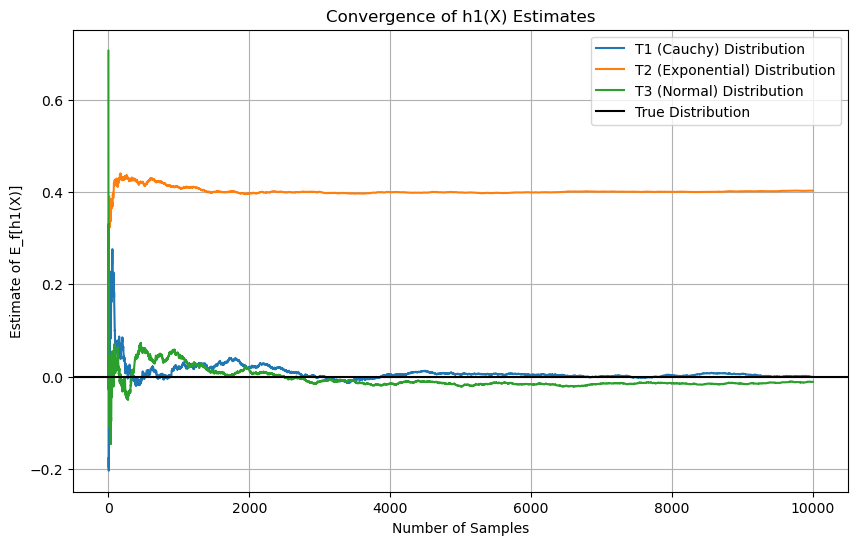

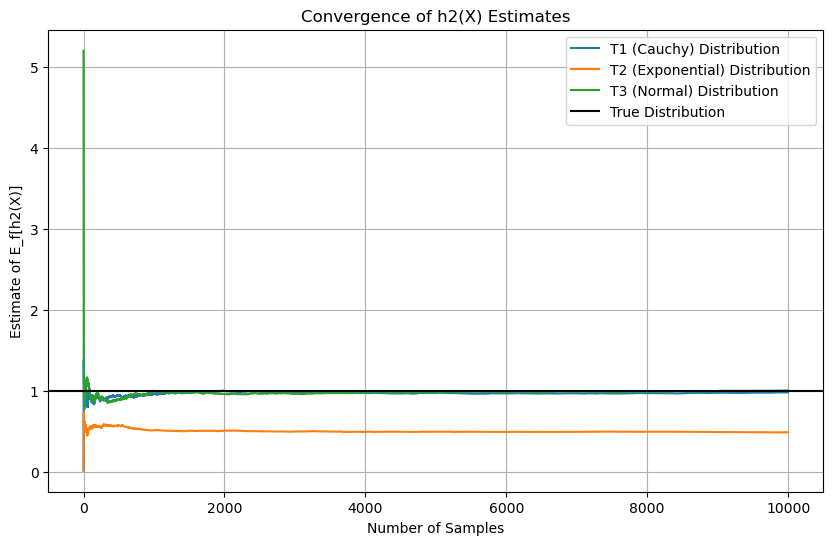

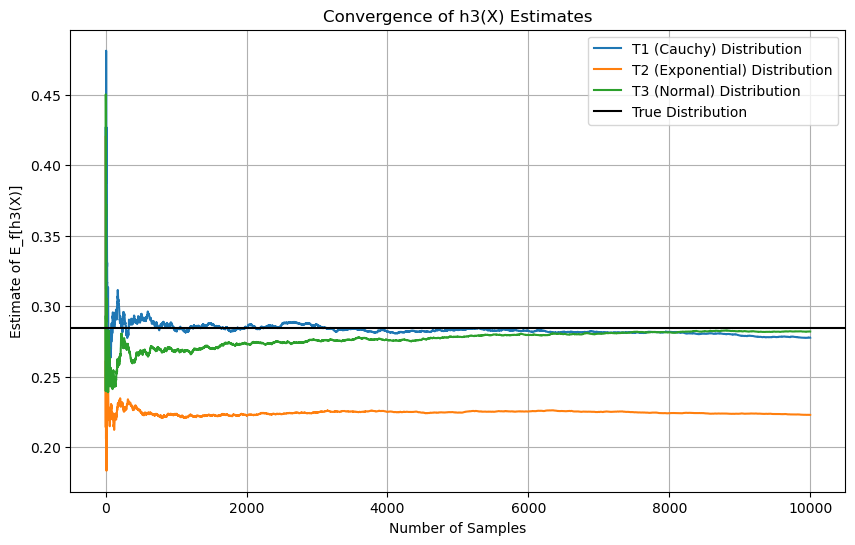

In [3]:
import math
import random
import matplotlib.pyplot as plt

# Define the function h_i(x) for i = 1, 2, 3
def h1(x):
    return x

def h2(x):
    return x**2

def h3(x):
    return 1 / (1 + (x - 2)**2)

# Define the true distribution f(x) (here we assume a standard normal distribution)
def true_distribution(x):
    return (1 / math.sqrt(2 * math.pi)) * math.exp(-0.5 * x**2)

# Define the instrumental distributions
def t1_distribution(x):
    return (1 / math.pi) * (1 / (1 + x**2))  # Cauchy distribution

def t2_distribution(x):
    return math.exp(-x) if x >= 0 else 0  # Exponential distribution

def t3_distribution(x):
    return (1 / math.sqrt(2 * math.pi)) * math.exp(-0.5 * x**2)  # Normal distribution

# Sampling functions for each instrumental distribution
def sample_t1():
    return math.tan(math.pi * (random.random() - 0.5))  # Inverse transform sampling for Cauchy

def sample_t2():
    return -math.log(random.random())  # Inverse transform sampling for Exponential

def sample_t3():
    return random.gauss(0, 1)  # Normal distribution

# Importance sampling function
def importance_sampling(h, sample_fn, weight_fn, num_samples):
    estimates = []
    cumulative_sum = 0
    for _ in range(num_samples):
        x = sample_fn()
        weight = weight_fn(x)
        estimate = h(x) * weight
        cumulative_sum += estimate
        estimates.append(cumulative_sum / (_ + 1))
    return estimates

# Weight functions
def weight_t1(x):
    return true_distribution(x) / t1_distribution(x)

def weight_t2(x):
    return true_distribution(x) / t2_distribution(x)

def weight_t3(x):
    return true_distribution(x) / t3_distribution(x)

# Simulation parameters
num_samples = 10000
h_functions = [h1, h2, h3]
sample_fns = [sample_t1, sample_t2, sample_t3]
weight_fns = [weight_t1, weight_t2, weight_t3]
labels = ["T1 (Cauchy)", "T2 (Exponential)", "T3 (Normal)", "True"]

# Plot results
for h, h_label in zip(h_functions, ["h1", "h2", "h3"]):
    plt.figure(figsize=(10, 6))
    for sample_fn, weight_fn, label in zip(sample_fns, weight_fns, labels[:-1]):
        estimates = importance_sampling(h, sample_fn, weight_fn, num_samples)
        plt.plot(estimates, label=f"{label} Distribution")
    # True value (for comparison)
    true_value = sum(h(x) * true_distribution(x) for x in range(-10, 11))
    plt.axhline(y=true_value, color='black', linestyle='-', label="True Distribution")
    plt.title(f"Convergence of {h_label}(X) Estimates")
    plt.xlabel("Number of Samples")
    plt.ylabel(f"Estimate of E_f[{h_label}(X)]")
    plt.legend()
    plt.grid()
    plt.show()
